In [ ]:
Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv,
пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

Описание датасета:
Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

### Импорты

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Загружаем данные

In [3]:
Train_df = pd.read_csv("train.csv")
Test_df = pd.read_csv("test.csv")

In [4]:
Test_df.shape

(5000, 19)

In [5]:
Train_df.shape

(10000, 20)

### Рассматриваем данные

In [6]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
# нуливых значений нет, тип данных разный

In [8]:
Train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
# Мы видим только количественные признаки.
# Из их просмотра делаю следующие выводы:
#     1. В признаках LifeSquare, Healthcare_1 количество строк меньше 10000 - значит, в этих признаках есть пропущенные 
#     значения. Однако их больше половины, поэтому удалять эти столбцы не буду - заполню средними значениями.
#     2. Square - общая площадь квартиры, LifeSquare - жилая площадь. Жилая площадь должна быть меньше общей площади. 
#     3. Считаю 117 этажей в доме (мах для HouseFloor) неправдоподобными данныеми.

In [10]:
# Рассматриваю категориальные признаки
Train_df.describe(include=[object])
# Из полученных данных видим, что эти признаки имеют 2 значения, из которых самое  
# частовстречаемое значение В. Далее убедимся, что признаки бинарные.

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [11]:
categor_priznak = [a for a in Train_df.columns if Train_df[a].dtype.name == 'object']
for a in categor_priznak:
    print (Train_df[a].unique())

['B' 'A']
['B' 'A']
['B' 'A']


In [12]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [13]:
# Видим, что в тестовых данных также есть пропущенные данные в LifeSquare и Healthcare_1, а также видим категориальные признаки
# Ecology_2 Ecology_3 Shops_2 

### Заполняем пустые данные

In [14]:
#  Пустные данные найдены в признаках LifeSquare, Healthcare_1 

In [15]:
LifeSquare_mean = Train_df["LifeSquare"].mean()
print(LifeSquare_mean)
Train_df["LifeSquare"].fillna(LifeSquare_mean, inplace=True)

37.19964482767308


In [16]:
Healthcare_1_mean= Train_df["Healthcare_1"].mean()
print(Healthcare_1_mean)
Train_df["Healthcare_1"].fillna(Healthcare_1_mean, inplace=True)

1142.9044598231449


In [17]:
LifeSquare_mean = Test_df["LifeSquare"].mean()
print(LifeSquare_mean)
Test_df["LifeSquare"].fillna(LifeSquare_mean, inplace=True)

36.15881045508672


In [18]:
Healthcare_1_mean= Test_df["Healthcare_1"].mean()
print(Healthcare_1_mean)
Test_df["Healthcare_1"].fillna(Healthcare_1_mean, inplace=True)

1146.6572626763248


### Приводим категориальные признаки к количественному типу 

In [19]:
# Так как наши признаки Ecology_2 Ecology_3 Shops_2 бинарные, мы приводим их к значеним 0 и 1
Train_df.at[Train_df['Ecology_2'] == 'A', 'Ecology_2'] = 0
Train_df.at[Train_df['Ecology_2'] == 'B', 'Ecology_2'] = 1
Train_df['Ecology_2'].describe()

count     10000
unique        2
top           1
freq       9903
Name: Ecology_2, dtype: int64

In [20]:
Test_df.at[Test_df['Ecology_2'] == 'A', 'Ecology_2'] = 0
Test_df.at[Test_df['Ecology_2'] == 'B', 'Ecology_2'] = 1
Test_df['Ecology_2'].describe()

count     5000
unique       2
top          1
freq      4952
Name: Ecology_2, dtype: int64

In [21]:
Train_df.at[Train_df['Ecology_3'] == 'A', 'Ecology_3'] = 0
Train_df.at[Train_df['Ecology_3'] == 'B', 'Ecology_3'] = 1
Train_df['Ecology_3'].describe()

count     10000
unique        2
top           1
freq       9725
Name: Ecology_3, dtype: int64

In [22]:
Test_df.at[Test_df['Ecology_3'] == 'A', 'Ecology_3'] = 0
Test_df.at[Test_df['Ecology_3'] == 'B', 'Ecology_3'] = 1
Test_df['Ecology_3'].describe()

count     5000
unique       2
top          1
freq      4851
Name: Ecology_3, dtype: int64

In [23]:
Train_df.at[Train_df['Shops_2'] == 'A', 'Shops_2'] = 0
Train_df.at[Train_df['Shops_2'] == 'B', 'Shops_2'] = 1
Train_df['Shops_2'].describe()

count     10000
unique        2
top           1
freq       9175
Name: Shops_2, dtype: int64

In [24]:
Test_df.at[Test_df['Shops_2'] == 'A', 'Shops_2'] = 0
Test_df.at[Test_df['Shops_2'] == 'B', 'Shops_2'] = 1
Test_df['Shops_2'].describe()

count     5000
unique       2
top          1
freq      4588
Name: Shops_2, dtype: int64

### Рассматриваем графические представления

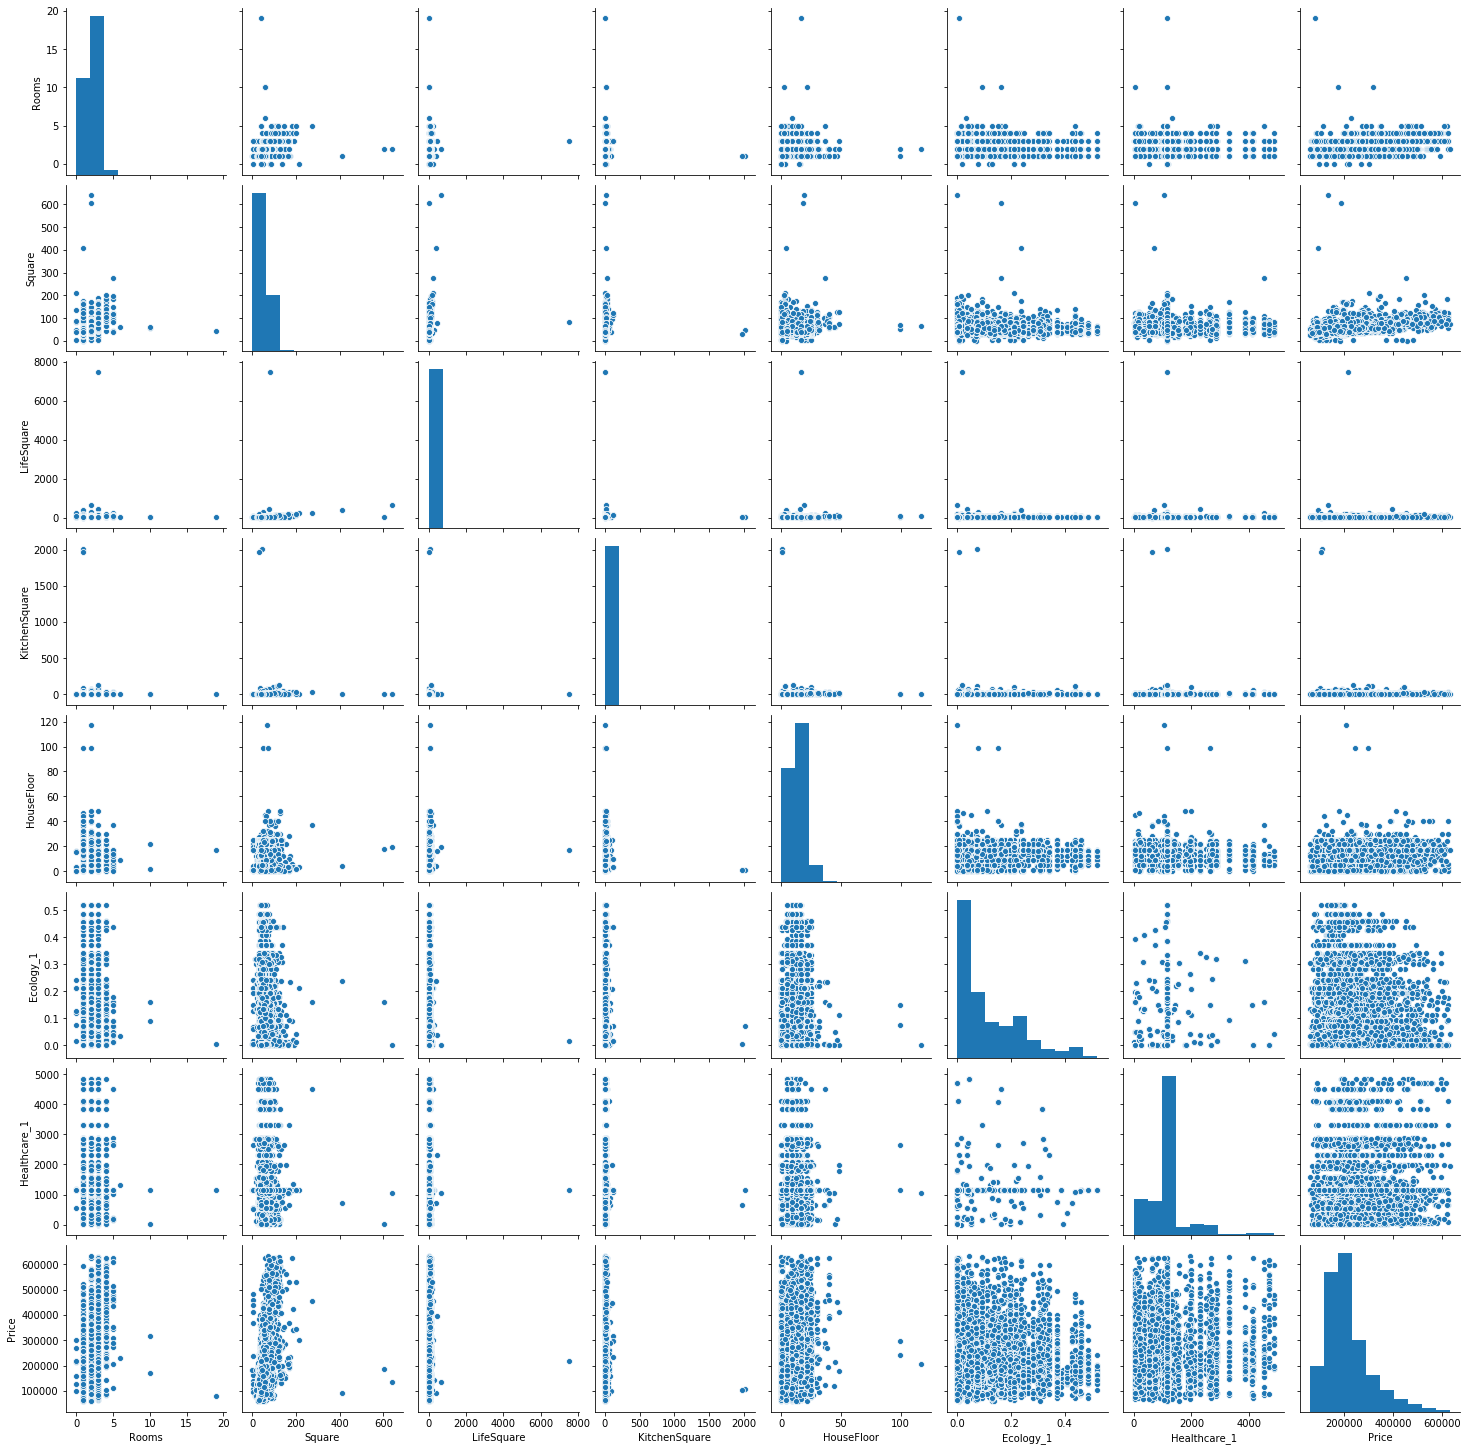

In [25]:
sns.pairplot(Train_df.select_dtypes(include='float64'))
# Данное отображение дает общее представление о распределении признаков, выбросы присутствуют

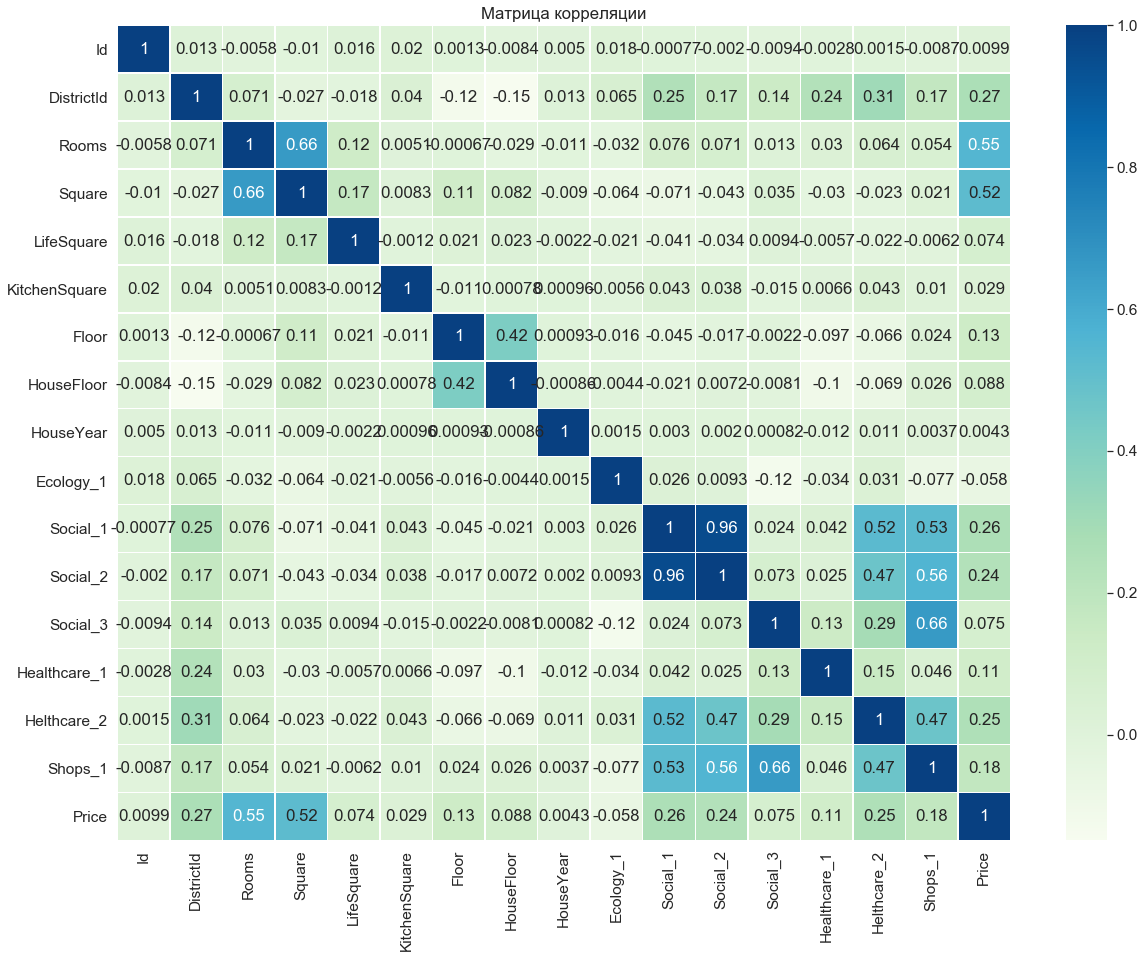

In [26]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(Train_df.corr(), annot=True, linewidth=0.5, cmap='GnBu')
plt.title('Матрица корреляции')
plt.show()

In [68]:
# Из данных матрицы можно сделать следующие выволды:
#     - Цена напрямую зависима от количества комнат и площади,
#     - На цену довольно сильно влияет район, социальные факторы, фактор здоровья-1,
#     - На цену почти не влияет год постройки - это странно,в реальности это не так (возможно, именно дата и не влияет,
#       наверное, этот показатель был бы весомее, если бы трактовался как Возраст дома -мое предположение),
#     - На цену почти не влияет экологический фактор 1.
#     - Также мы видим меньшее влияние жилой площади, этажности, площади кухни
#     - Мы также видим зависимость социальных признаков между собой, зависимость площади от количетсва комнат, а тажке 
#     зависимость показаетелей наличия магазинов от социальных показателей

### Разбиваем данные

In [ ]:
#### Разбиваем тренировочные данные на массивы х и y, где х - тренировочные признаки, оказывающие влияние на y  - цену 
#### (цена - целевое значение).
#### В таблицу признаков не включаю столбец id, так как в поясниении написано, что id - это идентификационный номер квартиры, 
#### и влияния на цену он оказывать не может
#### Из тестовых данныех также убираем столбец id

In [27]:
x = pd.DataFrame (Train_df, columns=["DistrictId", 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: floa

In [28]:
y = pd.DataFrame (Train_df, columns=['Price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Сторим модели при обучении с учителем, выбираем лучшую

#### Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = lr.predict(x_test)
y_pred.shape

(3000, 1)

In [21]:
r2_score (y_test, y_pred)

0.46317052025780914

#### значение r2 очень маленькое, что говорит о том, что модель дает не точные предстказания

#### Random Forest

In [30]:
rd=RandomForestRegressor()
rd.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
y_pred=rd.predict(x_test)
r2_score (y_test, y_pred)

0.721724515578956

#### значение r2 больше 0,6 - эта модель дает более точные предсказания, чем модель линейной регрессии

In [163]:
# Модели knn и svc не получилось использовать - помешала ошибка Unknown label type: 'continuous', которую устранить не смогла

In [91]:
# scaled = scaler.fit_transform(y_train)
# inversed = scaler.inverse_transform(scaled)

In [32]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(x_train, y_train.astype(int))
# y_pred=knn.predict(x_test)
# r2_score (y_test, y_pred)

0.03176202317287602

In [66]:
from sklearn.model_selection import GridSearchCV

In [86]:
gb_model=RandomForestRegressor(random_state=21)
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    gb_model,
    parameters,
    scoring='r2',
    cv=10
)


In [87]:
clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=21,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [88]:
clf.best_params_

{'max_depth': 9, 'max_features': 8, 'n_estimators': 200}

In [89]:
clf = RandomForestRegressor(max_depth=9, max_features=8, n_estimators=200)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
y_pred=clf.predict(x_test)
r2_score (y_test, y_pred)

0.7068821027834865

In [ ]:
### результат не тот, что ожидала- r2 стал еще меньше

#### Запускаем модель на тестовых данных Test_df

In [33]:
test = pd.DataFrame (Test_df, columns=["DistrictId", 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']) 
### убрала id из тестовых данных

In [34]:
y_result=rd.predict(test)
result=pd.DataFrame (y_result, columns=['Prise'])

In [35]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prise   5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [36]:
result.to_csv('SharikovaOA_predictions.csv')